# DSA Project
## Library Management System Using Linked Lists
<hr>

### AIE-B Group-2
#### Team Memebers:
Anantha Krishna SK (CB.SC.U4AIE24102) <br>
Mahankali Sri Ram Krishna (CB.SC.U4AIE24127) <br>
T Devi Sri Soumith (CB.SC.U4AIE24155) <br>
Yogesh Jambunathan Kannan (CB.SC.U4AIE24161) <hr>

### Introduction:
__Goal:__ In this project, we aim to create a library managemnt system which can perform multiple tasks which are essential for proper management of a huge amount of books. It aims to ease out the work of a librarian.

#### Keywords:
* Using __linked lists__ to perform all the essential operations required to manage a library.
* Storing the data in a CSV file.
  
<hr>

### 1. Identification of Data Structure:
To create library management system, we will be implementing the data structure called linked list.
#### Linked List:
* Linked list is a non-primitive, linear data structure in which elements (nodes) are connected using pointers.
* There are three types of linked lists:
  * Singly linked list
  * Doubly linked list
  * Circular linked list

##### 1. Singly Linked List:
* In this type of linked lists, the each node contains two parts, data and a pointer towards the next node.
* The last node's pointer is "__None__". This indicates the end of the list.
* The pointer of the first node is stored in a separate pointer called "__head__".

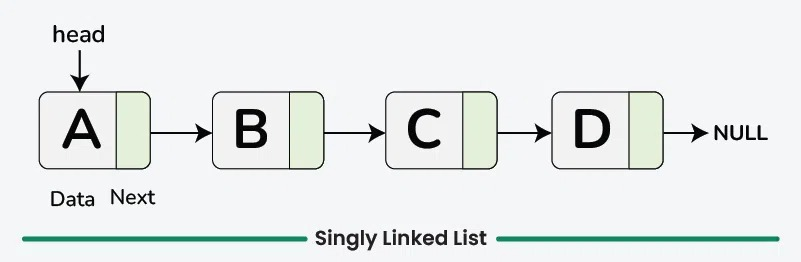

##### 2. Doubly Linked List:
* In this type of linked lists, each node contains data and two pointers. One pointing towards the previous node and the other towards the next.
* They are better than singly linked lists because:
  * Doubly linked lists allow bidirectional traversal
  * There no need to keep track of the previous node while deletion.
  * It is more flexible for performing undo/redo operations.
* But it also has disadvantages of being slow and consuming more memory due to the presence of an extra pointer.

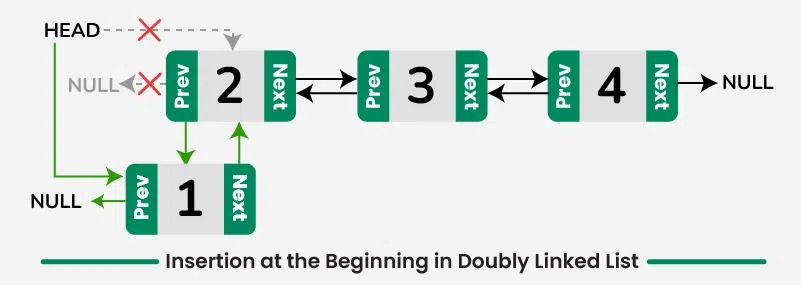

##### 3. Circular Linked List:
* It is similar to doubly linked lists, but here the pointer of the last node is pointed towrds the first node.
* These linked lists have advantages like:
  * Traversal can continue indefinetly as there is no Null pointer
  * This type can be used to perform cyclic processes.
* Disadvantages:
  * Deletion process is more complex because the last node must link back to the first node.
  * Unlike singly linked lists, extra logic is required to detect when we complete a full loop.
  * Since, there is no None pointer, infinite loops can occur if the traversal condition is not handled correctly.

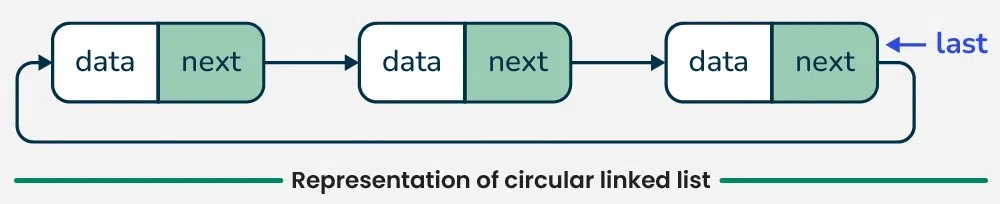

Due to the above mentioned disadavantes of DLL and CLL, we have chosed to implement the project using SLL. 

#### Why Use Linked List Over Other Data Structures?
* Linked lists has dynamic size unlike arrays, stack, and queue.
* Due to the dynamic size, there is no wastage of memory like in arrays.
* Insertion and deletion can be done even from the middle in LLs as compared to other data structures, like stack (LIFO) and queue (FIFO).

<hr>

### 2. Code Structure and Design:
Three classes have been used in this code
* Book
* Node
* Library

#### Book Class:
This class represents a book, with attributes like __title__, __author__, __ISBN__, and __availability__. It also includes a method "__  __str__ __" to print the book details.

#### Node Class:
* This class acts as the building block of creating a linked list. It has attributes book and node. 
* The "book" attribute contains the actual data of each book (title, author, ISBN, and availability).
* The "next" attribute is the reference to the next node in the linked list. 

#### Library Class:
This class contains all the methods that are required for the management of books in the library. 
##### 1. init:
* Contains the attributes head (for intiliasing the head node of the linked list) and csv_file (which contains the path of the stored books dataset)
##### 2. add_book:
* This method is used to add a new book to the library.
* It takes book title, author and isbn as parameters.
* It calls another method, "search_by_isbn", to search through the dataset to check if an existing book has the same ISBN number as the new book.
* If there is no match, it gets added to the end of the linked list and the CSV file using the method "save_books_to_csv".
* If the library is empty, it add the bood details to the start of both the linked list and CSV file.
##### 3. delete_book:
* This method is used to delete a book from the library.
* It takes the ISBN of the book as parameters.
* It searches for the book using the method "search_by_isbn" and if the entered ISBN number matches one of the book in the dataset, it gets deleted.
* If the dataset is empty, it returns a statement telling that the library is empty.
##### 4. search_book:
* This method is used to search for a book using either its name or author.
* It takes "keywords" as a parameter. It contains a flag named "found" which will be initialy set to False.
* If a book if found with a matching keyword, it will changed to True.
##### 5. search_by_isbn:
* This method is used to search for a book using its ISBN number.
* It takes the isbn as parameter.
* It converts the the input isbn number into a string and uses the strip function to remove white spaces.
* If the entered ISBN number matches an existing ibsn, it returns the data for that book.
##### 6. display_book:
* This method is used to return all the books available in the library.
* It traverses through the linked list and prints all the nodes.
##### 7. mark_as_borrowed:
* This method is used to mark a book as borrowed by a person.
* It takes isbn as a parameter.
* If a book is found with a matching ISBN and the availability is True, it will be marked as borrowed.
* In the availability column of the CSV file, the value will be changed from True to False
##### 8. mark_as_returned:
* This method is used to mark a book as returned by the person.
* It takes isbn as a parameter.
* If a book is found with a matching ISBN and the availability is is False, it will marked as returned.
* In the availability column of the CSV file, the value will be changed from False to True. 
##### 9. load_books_from_csv:
* This method will be used to load the data from the CSV file to the linked list.
* It read the the CSV file using the csv module.
* Then it creates a dictionary with title, author, isbn and availibility as keys, and gets the corresponding values by iterating through the csv file.
* Then it calls the "add_book" method to add the data into the linked list.
* If any invalid input is given in the dataset, it would just skip that row.
* If the CSV file is not found, it creates the dataset in a new library.
* In case an error occurs while loading the dataset, it throws that particular error. 
##### 10. save_books_to_csv:
* This method is used to save the data into the csv file, after a book has been added, removed, borrowed, or returned.
* It opens the file in write mode, creates a writer object and uses writerow command to update the data from the linked list by iterating through it.
* If an error occurs while saving the data, it throws that particular error.

In [10]:
import csv

class Book:
    def __init__(self, title, author, isbn, available=True):
        self.title = title
        self.author = author
        self.isbn = isbn
        self.available = available

    def __str__(self):
        status = "Available" if self.available else "Borrowed"
        return f"{self.title} by {self.author} (ISBN: {self.isbn}) - {status}"


class Node:
    def __init__(self, book):
        self.book = book
        self.next = None


class Library:
    def __init__(self, csv_file="books30.csv"):
        self.head = None
        self.csv_file = csv_file  # Store the CSV file path
        self.load_books_from_csv()  # Load existing books from the CSV file

    def add_book(self, title, author, isbn):
        # Check if a book with the same ISBN already exists
        if self.search_by_isbn(isbn):
            print(f"Book with ISBN {isbn} already exists.")
            return

        new_book = Book(title, author, isbn)
        new_node = Node(new_book)
        if self.head is None:
            self.head = new_node
        else:
            current = self.head
            while current.next is not None:
                current = current.next
            current.next = new_node
        self.save_books_to_csv()  # Save the updated library to the CSV file

    def delete_book(self, isbn):
        if not self.head:
            print("The library is empty. No book to delete.")
            return
        if self.head.book.isbn == isbn:
            print(f"Book '{self.head.book.title}' removed successfully!")
            self.head = self.head.next
            self.save_books_to_csv()  # Save the updated library to the CSV file
            return
        current = self.head
        while current.next and current.next.book.isbn != isbn:
            current = current.next
        if current.next:
            print(f"Book '{current.next.book.title}' removed successfully!")
            current.next = current.next.next
            self.save_books_to_csv()  # Save the updated library to the CSV file
        else:
            print(f"No book found with ISBN {isbn}.")

    def search_book(self, keyword):
        current = self.head
        found = False
        while current:
            if keyword.lower() in current.book.title.lower() or keyword.lower() in current.book.author.lower():
                print(current.book)
                found = True
            current = current.next
        if not found:
            print(f"No books found matching '{keyword}'.")

    def search_by_isbn(self, isbn):
        isbn = str(isbn).strip()
        current = self.head
        while current:
            if str(current.book.isbn).strip() == isbn:
                print(current.book)
                return current.book
            current = current.next
        return None

    def display_books(self):
        if not self.head:
            print("The library is empty.")
            return
        current = self.head
        while current:
            print(current.book)
            current = current.next

    def mark_as_borrowed(self, isbn):
        current = self.head
        while current:
            if current.book.isbn == isbn:
                if current.book.available:
                    current.book.available = False
                    print(f"Book '{current.book.title}' marked as borrowed.")
                    self.save_books_to_csv()  # Save the updated library to the CSV file
                else:
                    print(f"Book '{current.book.title}' is already borrowed.")
                return
            current = current.next
        print(f"No book found with ISBN {isbn}.")

    def mark_as_returned(self, isbn):
        current = self.head
        while current:
            if current.book.isbn == isbn:
                if not current.book.available:
                    current.book.available = True
                    print(f"Book '{current.book.title}' marked as returned.")
                    self.save_books_to_csv()  # Save the updated library to the CSV file
                else:
                    print(f"Book '{current.book.title}' was not borrowed.")
                return
            current = current.next
        print(f"No book found with ISBN {isbn}.")

    def load_books_from_csv(self):
        try:
            with open(self.csv_file, mode='r') as file:
                reader = csv.DictReader(file)
                for row in reader:
                    title = row.get('title')
                    author = row.get('author')
                    isbn = row.get('isbn')
                    available = row.get('available', 'True').lower() == 'true'  # Default to True if not provided
                    if title and author and isbn:
                        # Check if the book already exists before adding
                        if not self.search_by_isbn(isbn):
                            self.add_book(title, author, isbn)
                            if not available:
                                self.mark_as_borrowed(isbn)  # Mark as borrowed if specified in the dataset
                    else:
                        print(f"Skipping invalid row: {row}")
            print("Books loaded successfully from the dataset!")
        except FileNotFoundError:
            print(f"File '{self.csv_file}' not found. Starting with an empty library.")
        except Exception as e:
            print(f"An error occurred while loading the dataset: {e}")

    def save_books_to_csv(self):
        try:
            with open(self.csv_file, mode='w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(['title', 'author', 'isbn', 'available'])  # Write header
                current = self.head
                while current:
                    writer.writerow([
                        current.book.title,
                        current.book.author,
                        current.book.isbn,
                        str(current.book.available).lower()
                    ])
                    current = current.next
        except Exception as e:
            print(f"An error occurred while saving the dataset: {e}")


# Example Usage
library = Library("C:\\Users\\jkyog\\OneDrive\\Desktop\\college\\S2\\DSA\\books30.csv")  

Books loaded successfully from the dataset!


In [13]:
library.search_by_isbn(671870432)

PLEADING GUILTY by Scott Turow (ISBN: 671870432) - Available


In [16]:
library.delete_book("671870432")

Book 'PLEADING GUILTY' removed successfully!


In [19]:
library.search_book("PLEADING GUILTY")

No books found matching 'PLEADING GUILTY'.
